## In-Demand Skills Analysis Based on Job Postings

The goal of this project is to analyze a synthetic dataset of job postings to identify in-demand skills, job roles, and salary expectations. By understanding these trends, job seekers can better target their applications, and employers can align their hiring strategies.

Dataset Description
The dataset consists of synthetic job postings generated with the following attributes:

```Job Title, Company Name, Required Skills, Location, Industry, Job Type, Experience Level, Posting Date, Salary Range.```


In [1]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('job_postings_last_3_years.csv')

In [2]:
print("Number of Job Postings = ", len(data))

Number of Job Postings =  715


In [3]:
data.head()

,Job Title,Company Name,Required Skills,Location,Industry,Job Type,Experience Level,Posting Date,Salary Range
0,Business Intelligence Analyst,Netflix,"['SQL', 'Power BI', 'Data Warehousing', 'Excel']",San Francisco,Education,Part-Time,Mid-level,2023-05-20,120k-150k
1,Investment Analyst,Facebook,"['Financial Modeling', 'Valuation', 'Portfolio...",Chicago,Finance,Part-Time,Mid-level,2024-05-14,120k-150k
2,Customer Support Specialist,Tesla,"['Customer Service', 'CRM', 'Communication', '...",Berlin,Tech,Full-Time,Senior,2023-05-17,150k-200k
3,Recruitment Specialist,IBM,"['Talent Sourcing', 'Interviewing', 'ATS', 'Ca...",Toronto,Consulting,Full-Time,Mid-level,2023-04-02,80k-100k
4,Data Analyst,Facebook,"['Python', 'SQL', 'Tableau', 'Excel']",Remote,E-commerce,Internship,Entry-level,2022-12-14,120k-150k


In [4]:
# Display summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job Title         715 non-null    object
 1   Company Name      715 non-null    object
 2   Required Skills   715 non-null    object
 3   Location          715 non-null    object
 4   Industry          715 non-null    object
 5   Job Type          715 non-null    object
 6   Experience Level  715 non-null    object
 7   Posting Date      715 non-null    object
 8   Salary Range      715 non-null    object
dtypes: object(9)
memory usage: 50.4+ KB


In [5]:
# Check for missing values
print(data.isnull().sum())

Job Title           0
Company Name        0
Required Skills     0
Location            0
Industry            0
Job Type            0
Experience Level    0
Posting Date        0
Salary Range        0
dtype: int64


In [6]:
print(data['Job Title'].value_counts())

Job Title
Accountant                       45
Investment Analyst               42
SEO Analyst                      41
Product Manager                  40
Social Media Manager             38
Customer Support Specialist      38
Digital Marketing Specialist     36
HR Manager                       35
Back-End Developer               35
Project Manager                  35
Software Engineer                33
Data Scientist                   33
Front-End Developer              32
Financial Analyst                31
Recruitment Specialist           30
Business Intelligence Analyst    30
Full-Stack Developer             29
Technical Product Manager        29
Data Analyst                     29
Customer Success Manager         28
Talent Acquisition               26
Name: count, dtype: int64


### Top 10 In-Demand Skills

This analysis identifies the most commonly requested skills across job postings. By exploding the Required Skills column, we can count the frequency of each skill. The top 10 skills are displayed to provide insights into what employers are looking for in candidates.

In [7]:
import ast
data['Required Skills'] = data['Required Skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode the 'Required Skills' column to get individual skills in rows
all_skills = data.explode('Required Skills')['Required Skills']

# Count the frequency of each skill
top_skills = all_skills.value_counts().head(10)

# Display the top 10 skills
print("Top 10 In-Demand Skills:\n", top_skills)

Top 10 In-Demand Skills:
 Required Skills
Excel                 177
Python                130
SQL                   123
Agile                 104
Communication          78
SEO                    77
Google Analytics       77
Financial Modeling     73
CRM                    66
Node.js                64
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_6048\2359715921.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='coolwarm')


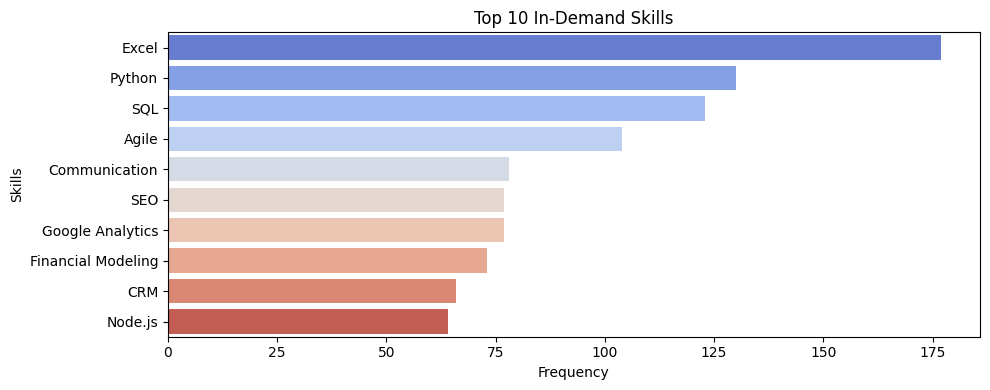

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Top 10 In-Demand Skills
plt.figure(figsize=(10, 4))
sns.barplot(x=top_skills.values, y=top_skills.index, palette='coolwarm')
plt.title('Top 10 In-Demand Skills')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.tight_layout()
plt.show()


### Top 10 In-Demand Job Roles

This section analyzes the most common job roles in the dataset, helping to understand which positions are in highest demand in the job market.

In [22]:
top_job_roles = data['Job Title'].value_counts().head(10)

# Display the top 10 roles
print("Top 10 In-Demand Job Roles:\n", top_job_roles)

Top 10 In-Demand Job Roles:
 Job Title
Accountant                      45
Investment Analyst              42
SEO Analyst                     41
Product Manager                 40
Social Media Manager            38
Customer Support Specialist     38
Digital Marketing Specialist    36
HR Manager                      35
Back-End Developer              35
Project Manager                 35
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_6048\39074881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_roles.index, y=top_job_roles.values, palette='viridis')


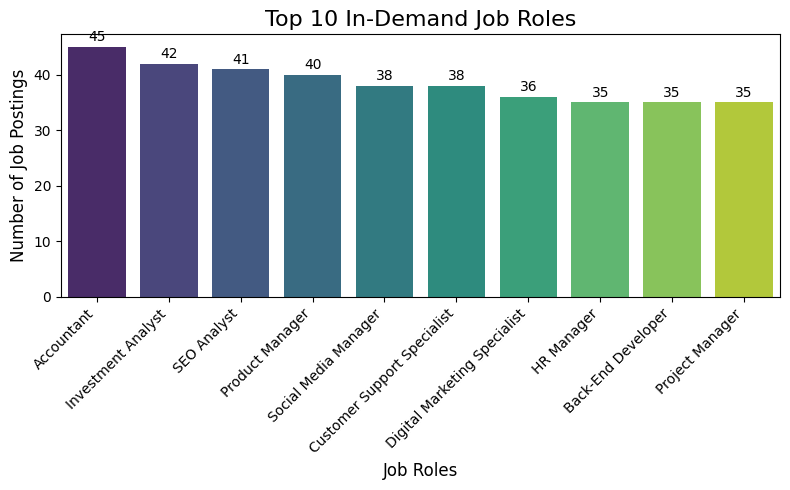

In [23]:

# Vertical bar chart for top 10 in-demand job roles
plt.figure(figsize=(8, 5))
sns.barplot(x=top_job_roles.index, y=top_job_roles.values, palette='viridis')

# Add labels and title
plt.title('Top 10 In-Demand Job Roles', fontsize=16)
plt.xlabel('Job Roles', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add value labels on the bars
for index, value in enumerate(top_job_roles.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()



### Location based analysis

The purpose of this analysis is to identify which job roles are most prevalent in different geographic locations. Understanding location-based trends can help job seekers target their applications more effectively and allow employers to focus their hiring efforts in areas with the greatest demand for specific roles.

In [ ]:
# Group by 'Location' and count job titles
location_role_counts = data.groupby('Location')['Job Title'].value_counts()

# Create an empty dictionary to store the top roles for each location
top_roles_by_location = {}

# Iterate over each location and get the top 5 roles
for location in data['Location'].unique():
    top_roles = location_role_counts[location].head(5)  # Get top 5 roles for each location
    top_roles_by_location[location] = top_roles

# Display the top roles for each location
for location, roles in top_roles_by_location.items():
    print(f"\nTop 5 Roles in {location}:")
    print(roles)


### Job Postings by Industry

This analysis shows how job postings are distributed across various industries, providing insights into where opportunities are most abundant.

In [25]:
# Count the number of job postings for each industry
industry_counts = data['Industry'].value_counts()

# Display the counts
print("Job Postings by Industry:\n", industry_counts)


Job Postings by Industry:
 Industry
E-commerce       113
Education         96
Consulting        89
Finance           87
Healthcare        87
Marketing         85
Tech              82
Manufacturing     76
Name: count, dtype: int64


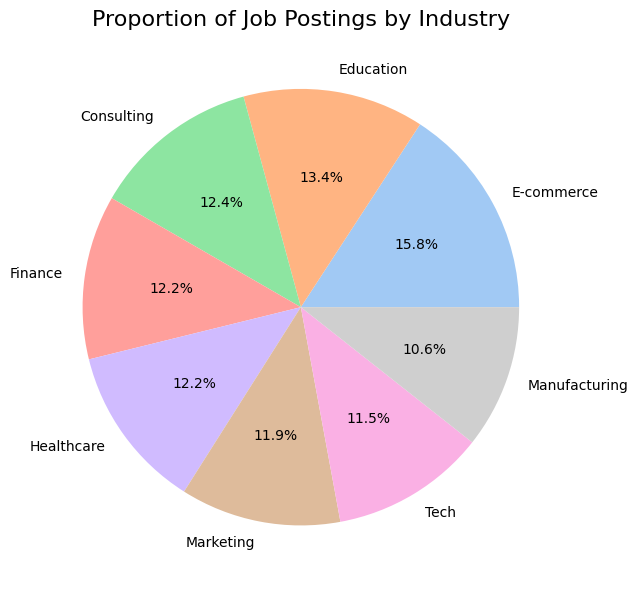

In [35]:
# Plot a pie chart for job postings by industry
plt.figure(figsize=(8, 6))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))


# Add a title
plt.title('Proportion of Job Postings by Industry', fontsize=16)
plt.tight_layout()

# show plot
plt.show()


### Trends Over Time

This analysis examines how job postings have changed over the years. It helps identify trends in job demand, such as periods of growth or decline.

In [39]:
# Convert Posting Date to datetime
data['Posting Date'] = pd.to_datetime(data['Posting Date'])

# Group by year and count job titles
time_role_counts = data.groupby(data['Posting Date'].dt.year)['Job Title'].value_counts()

# Analyze top roles over the years
for year in data['Posting Date'].dt.year.unique():
    top_roles = time_role_counts[year].head(5)
    print(f"\nTop 5 Roles in {year}:")
    print(top_roles)



Top 5 Roles in 2023:
Job Title
Social Media Manager    19
SEO Analyst             18
Accountant              15
Front-End Developer     14
Software Engineer       14
Name: count, dtype: int64

Top 5 Roles in 2024:
Job Title
HR Manager                      14
Accountant                      13
Digital Marketing Specialist    12
Back-End Developer              10
Front-End Developer             10
Name: count, dtype: int64

Top 5 Roles in 2022:
Job Title
Investment Analyst    21
Product Manager       16
Accountant            15
Financial Analyst     15
Project Manager       15
Name: count, dtype: int64

Top 5 Roles in 2021:
Job Title
Customer Support Specialist    8
Investment Analyst             7
Data Analyst                   6
Project Manager                5
SEO Analyst                    5
Name: count, dtype: int64


### Average Salary Analysis

This section calculates the average salaries for each experience level by extracting the numerical values from the salary range. It provides insights into what candidates can expect to earn based on their experience level.

In [40]:
# Function to calculate the average salary from a salary range
def average_salary(salary_range):
    if isinstance(salary_range, str):
        # Split the range into lower and upper bounds
        lower, upper = salary_range.split('-')
        # Convert to numeric values (assuming the 'k' means thousands)
        return (int(lower[:-1]) + int(upper[:-1])) / 2  # Return average in thousands
    return None

# Apply the function to create a new column for average salary
data['Average Salary'] = data['Salary Range'].apply(average_salary)

# Display the updated DataFrame with the new Average Salary column
print(data[['Experience Level', 'Salary Range', 'Average Salary']].head())

  Experience Level Salary Range  Average Salary
0        Mid-level    120k-150k           135.0
1        Mid-level    120k-150k           135.0
2           Senior    150k-200k           175.0
3        Mid-level     80k-100k            90.0
4      Entry-level    120k-150k           135.0


In [41]:
# Calculate average salary for each experience level
avg_salary_by_level = data.groupby('Experience Level')['Average Salary'].mean().sort_values()

# Display the average salaries by experience level
print("Average Salaries by Experience Level:\n", avg_salary_by_level)


Average Salaries by Experience Level:
 Experience Level
Senior         113.317972
Entry-level    119.372197
Mid-level      120.272727
Name: Average Salary, dtype: float64


### Conclusion

The project offers valuable insights into the current job market, including in-demand skills and roles, industry distributions, average salary expectations, and trends over time. These findings can help job seekers tailor their applications and prepare for the job market effectively. Future work could involve applying the analysis to real-world datasets to further enhance the understanding of employment trends.